In [1]:
import ot
import sys
sys.path.insert(1, '../src/')
from scot import *

In [2]:
%run model.py

In [3]:
X=np.load("../data/scatac_feat.npy") 
y=np.load("../data/scrna_feat.npy")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (1047, 19)  y=  (1047, 10)


In [4]:
X, y  = normalize(X, norm="l2"), normalize(y, norm="l2")

model start
new_X.shape (1047, 5)
new_y.shape (1047, 5)
3


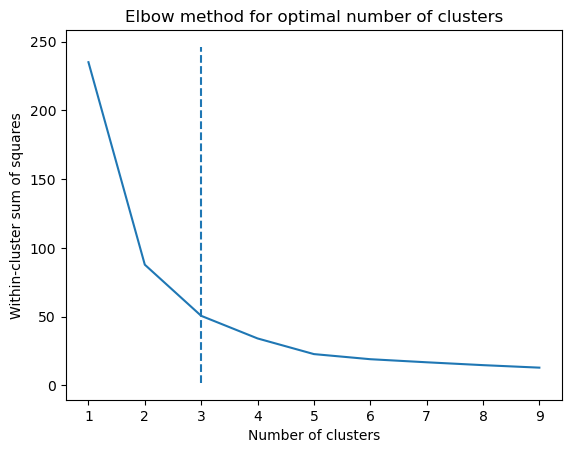

Best number of clusters: 3
2


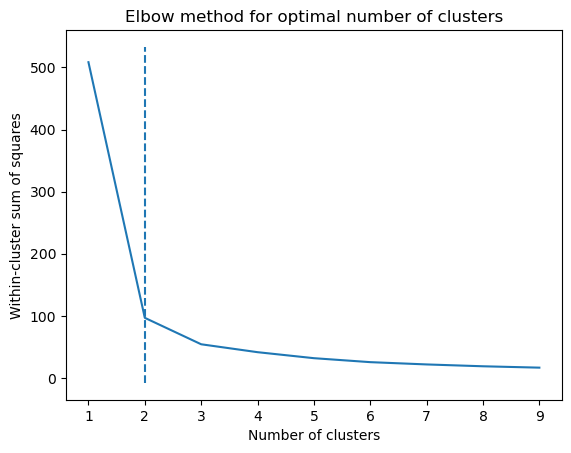

Best number of clusters: 2
iter 0
It.  |Err         
-------------------
    0|3.094476e-05|
It.  |Err         
-------------------
    0|1.446520e-05|
It.  |Err         
-------------------
    0|6.696083e-05|
iter 1
It.  |Err         
-------------------
    0|3.111523e-05|
It.  |Err         
-------------------
    0|1.457769e-05|
It.  |Err         
-------------------
    0|6.719858e-05|
iter 2
It.  |Err         
-------------------
    0|3.132005e-05|
It.  |Err         
-------------------
    0|1.470677e-05|
It.  |Err         
-------------------
    0|6.752054e-05|
iter 3
It.  |Err         
-------------------
    0|3.159538e-05|
It.  |Err         
-------------------
    0|1.489132e-05|
It.  |Err         
-------------------
    0|6.791008e-05|
iter 4
It.  |Err         
-------------------
    0|3.195699e-05|
It.  |Err         
-------------------
    0|1.515315e-05|
It.  |Err         
-------------------
    0|6.834457e-05|
model takes 56.617276 seconds


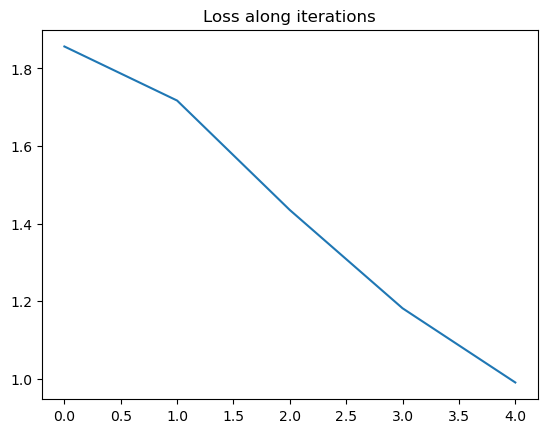

In [5]:
C1, C2, C1_opt, C2_opt = model(X,y, epsilon=1e-2, tol = 1e-2, lr=10)

In [6]:
C1

array([[0.        , 0.04259427, 0.04495534, ..., 0.050097  , 0.04292347,
        0.04737345],
       [0.04259427, 0.        , 0.01954783, ..., 0.02306489, 0.00891538,
        0.00697391],
       [0.04495534, 0.01954783, 0.        , ..., 0.01608815, 0.02645604,
        0.01560412],
       ...,
       [0.050097  , 0.02306489, 0.01608815, ..., 0.        , 0.03196557,
        0.02017171],
       [0.04292347, 0.00891538, 0.02645604, ..., 0.03196557, 0.        ,
        0.01375241],
       [0.04737345, 0.00697391, 0.01560412, ..., 0.02017171, 0.01375241,
        0.        ]])

In [7]:
C2

array([[0.        , 0.05742143, 0.05742143, ..., 0.05742143, 0.05742143,
        0.0717705 ],
       [0.05742143, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03094588],
       [0.05742143, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03094588],
       ...,
       [0.05742143, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03094588],
       [0.05742143, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03094588],
       [0.0717705 , 0.03094588, 0.03094588, ..., 0.03094588, 0.03094588,
        0.        ]])

In [8]:
C1_opt

array([[0.        , 0.0425905 , 0.04495094, ..., 0.05009125, 0.04291967,
        0.04736838],
       [0.04259045, 0.        , 0.01955008, ..., 0.02306624, 0.00892059,
        0.00697959],
       [0.04667956, 0.02040422, 0.        , ..., 0.00235606, 0.03147267,
        0.01593491],
       ...,
       [0.05009121, 0.02306626, 0.01609144, ..., 0.        , 0.03196456,
        0.02017387],
       [0.04291963, 0.0089206 , 0.02645648, ..., 0.03196456, 0.        ,
        0.01375632],
       [0.04736832, 0.00697959, 0.01560746, ..., 0.02017385, 0.0137563 ,
        0.        ]], dtype=float32)

In [9]:
C2_opt

array([[ 0.0000000e+00,  5.7413876e-02,  5.7413824e-02, ...,
         5.7413876e-02,  5.7413876e-02,  7.1759559e-02],
       [ 5.7413694e-02,  0.0000000e+00,  7.1931463e-06, ...,
         7.2490066e-06,  7.2490047e-06,  3.0945240e-02],
       [ 4.6369575e-02, -1.1036890e-02,  0.0000000e+00, ...,
        -1.1036890e-02, -1.1036890e-02,  1.9901106e-02],
       ...,
       [ 5.7413694e-02,  7.2490066e-06,  7.1931463e-06, ...,
         0.0000000e+00,  7.2490047e-06,  3.0945240e-02],
       [ 5.7413694e-02,  7.2490047e-06,  7.1931408e-06, ...,
         7.2490047e-06,  0.0000000e+00,  3.0945240e-02],
       [ 7.2385967e-02,  2.1740591e-02,  2.1740541e-02, ...,
         2.1740591e-02,  2.1740591e-02,  0.0000000e+00]], dtype=float32)

In [10]:
p = ot.unif(C1.shape[0])
q = ot.unif(C2.shape[0])
distance_C1_C2 = ot.gromov.entropic_gromov_wasserstein2(C1, C2, p, q, loss_fun = 'square_loss', epsilon=1e-2)
print('distance between C1 and C2:', distance_C1_C2)

distance between C1 and C2: 0.0008739790918238906


In [11]:
p = ot.unif(C1_opt.shape[0])
q = ot.unif(C2_opt.shape[0])
distance_C1_opt_C2_opt = ot.gromov.entropic_gromov_wasserstein2(C1_opt, C2_opt, p, q, loss_fun = 'square_loss', epsilon=1e-5)
print('distance between C1_opt and C2_opt:', distance_C1_opt_C2_opt)

distance between C1_opt and C2_opt: 0.0002658668115436244


In [12]:
p = ot.unif(C1_opt.shape[0])
q =  ot.unif(C2_opt.shape[0])
P = ot.gromov.entropic_gromov_wasserstein(C1_opt, C2_opt, p, q, loss_fun='square_loss', epsilon = 1e-2, log=False, verbose=True)

It.  |Err         
-------------------
    0|3.239924e-05|
   10|2.044064e-16|


In [13]:
# projection
#Projecting the first domain onto the second domain
y_new=normalize(y)
weights=np.sum(P,axis = 0)
X_new =np.matmul(P, normalize(y)) / weights[:, None]

In [14]:
X_new.shape

(1047, 10)

In [15]:
y_new.shape

(1047, 10)

In [16]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.4091992782802909


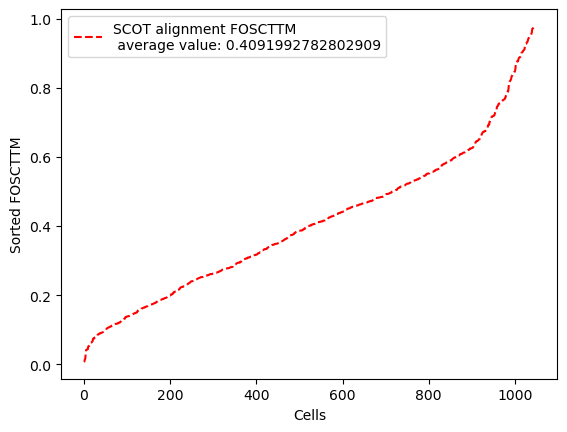

In [17]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

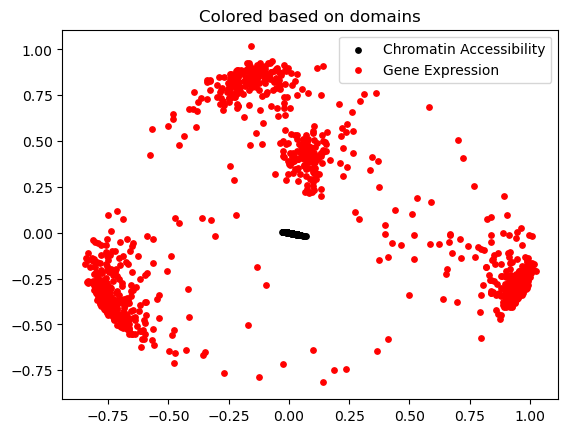

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca=Xy_pca[0: 1047,]
y_pca=Xy_pca[1047:,]

#Plot aligned domains, samples colored by domain identity:
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
plt.legend()
plt.title("Colored based on domains")
plt.show()

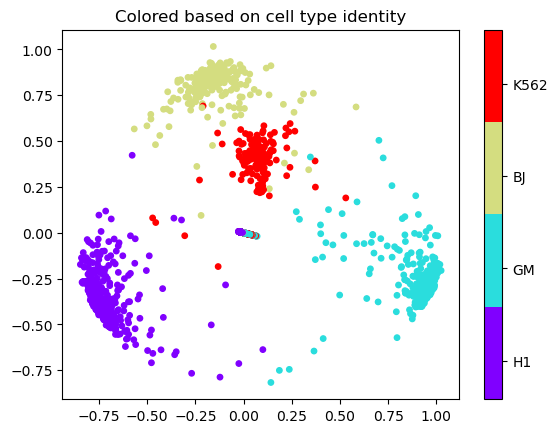

In [19]:
#Plot aligned domains, samples colored by cell types:
cellTypes_atac=np.loadtxt("../data/SNAREseq_atac_types.txt")
cellTypes_rna=np.loadtxt("../data/SNAREseq_rna_types.txt")

colormap = plt.get_cmap('rainbow', 4) 
plt.scatter(X_pca[:,0], X_pca[:,1], c=cellTypes_atac, s=15, cmap=colormap)
plt.scatter(y_pca[:,0], y_pca[:,1], c=cellTypes_rna, s=15, cmap=colormap)
# plt.colorbar()
cbar=plt.colorbar()

# approximately center the colors on the colorbar when adding cell type labels
tick_locs = (np.arange(1,5)+0.75) *3/4 
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(["H1", "GM", "BJ", "K562"]) #cell-type labels
plt.title("Colored based on cell type identity")
plt.show()

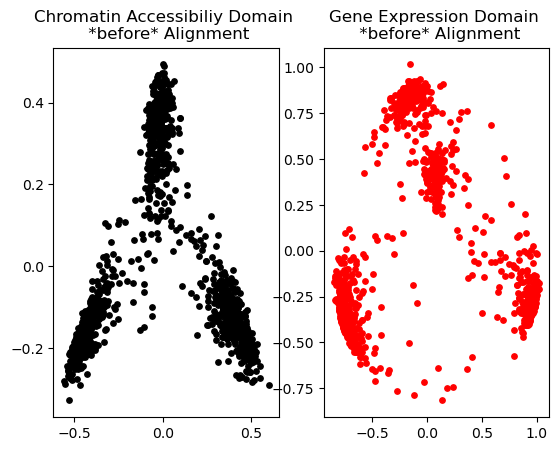

In [20]:
originalX_pca=pca.fit_transform(normalize(X))
originaly_pca=pca.fit_transform(normalize(y))

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
ax2.set_title("Gene Expression Domain \n *before* Alignment")
plt.show()

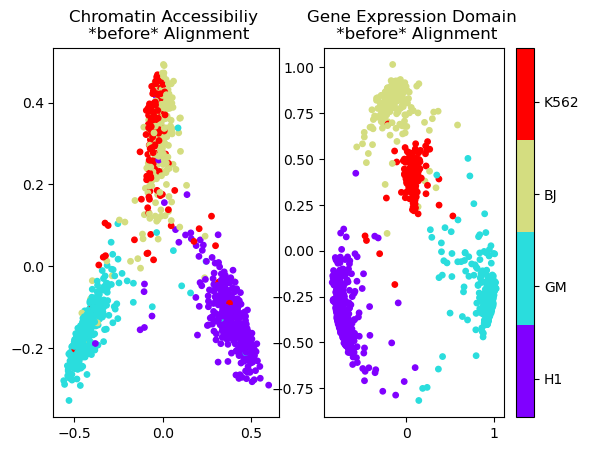

In [21]:
#Visualization of the cell type clusters in original domains *before* alignment
fig, (ax1, ax2)= plt.subplots(1,2)

fig1= ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c=cellTypes_atac, s=15, cmap=colormap)
ax1.set_title("Chromatin Accessibiliy \n *before* Alignment")

fig2= ax2.scatter(originaly_pca[:,0], originaly_pca[:,1],  c=cellTypes_rna, s=15, cmap=colormap)
ax2.set_title("Gene Expression Domain \n *before* Alignment")

cbar=fig.colorbar(fig2)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(["H1", "GM", "BJ", "K562"]) #cell-type labels